In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

import glob
all_files = glob.glob('./data/' +'/result*.txt')

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

res_file =  pd.concat(li, axis=0, ignore_index=True)

./data/results_2019-06-27.txt


In [3]:
res_file.head()

,total_q,size_id,train_q,test_q,topK,isbert,correct%
0,204,100,183,21,1,False,0.47619
1,204,100,183,21,1,True,0.52381
2,204,100,183,21,2,False,0.47619
3,204,100,183,21,2,True,0.52381
4,204,100,183,21,3,False,0.52381


In [4]:
agg_res = res_file.groupby(['size_id', 'isbert', 'topK']).agg('mean')
agg_res.head()

total_q  train_q  test_q  correct%
size_id isbert topK                                    
100     False  1       203.6    180.6    23.0  0.623110
               2       203.6    180.6    23.0  0.640326
               3       203.6    180.6    23.0  0.666516
        True   1       203.6    180.6    23.0  0.615966
               2       203.6    180.6    23.0  0.649022

In [5]:
#### prepare data for 
sers = []
s = agg_res['total_q'][:,True,1]
resdf = pd.DataFrame({'total_q':s.values})
for i in range(3):
    print(i)
    ser_laser = agg_res['correct%'][:,False,i+1]
    laser_df = pd.DataFrame({'correct_laser_'+str(i+1):ser_laser.values})
    ser_bert = agg_res['correct%'][:,True,i+1]
    bert_df = pd.DataFrame({'correct_bert_'+str(i+1):ser_bert.values})
    resdf = pd.concat([resdf, laser_df, bert_df], axis=1)



0
1
2


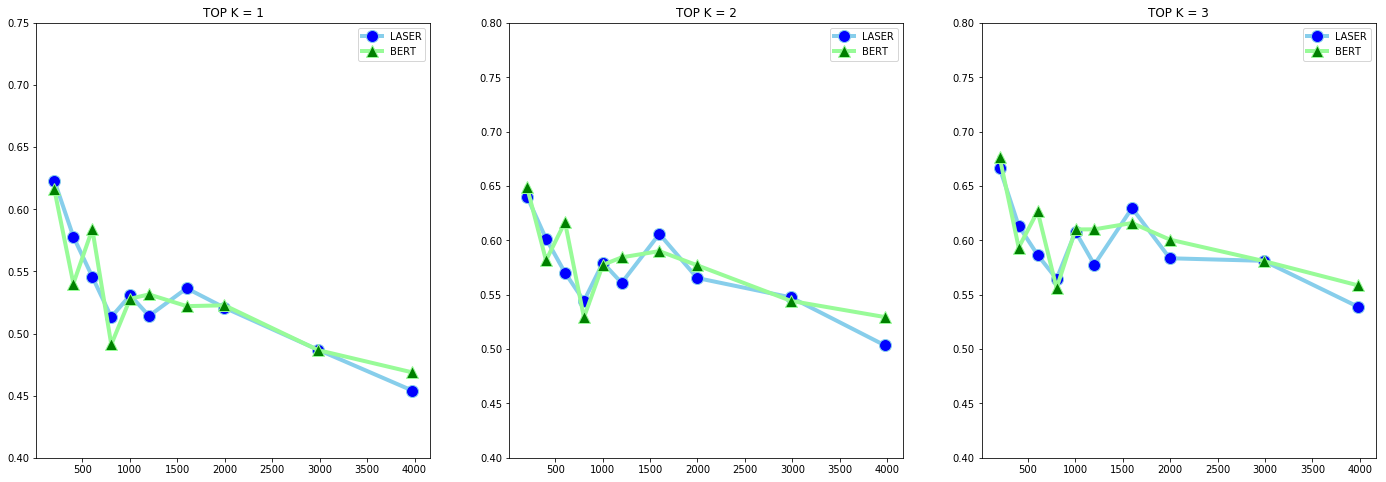

In [6]:
#### draw a plot
%matplotlib inline

plt.figure(figsize=(24, 8))

plt.subplot(131)
plt.plot( 'total_q', 'correct_laser_1', data=resdf, marker='o', markerfacecolor='blue', markersize=12, 
         color='skyblue', linewidth=4, label='LASER')
plt.plot( 'total_q', 'correct_bert_1', data=resdf, marker='^', markerfacecolor='green', markersize=12,
         color='palegreen', linewidth=4, label='BERT')
plt.ylim(0.4, 0.75);
plt.legend()
plt.gca().set_title('TOP K = 1')
plt.subplot(132)
plt.plot( 'total_q', 'correct_laser_2', data=resdf, marker='o', markerfacecolor='blue', markersize=12, 
         color='skyblue', linewidth=4, label='LASER')
plt.plot( 'total_q', 'correct_bert_2', data=resdf, marker='^', markerfacecolor='green', markersize=12,
         color='palegreen', linewidth=4, label='BERT')
plt.ylim(0.4, 0.8);
plt.legend()
plt.gca().set_title('TOP K = 2')
plt.subplot(133)
plt.plot( 'total_q', 'correct_laser_3', data=resdf, marker='o', markerfacecolor='blue', markersize=12,
         color='skyblue', linewidth=4, label='LASER')
plt.plot( 'total_q', 'correct_bert_3', data=resdf, marker='^', markerfacecolor='green', markersize=12, 
         color='palegreen', linewidth=4, label='BERT')
plt.ylim(0.4, 0.8);
plt.legend()
plt.gca().set_title('TOP K = 3')

plt.savefig('./data/result.png')